***Predicting Titanic Survivors***

In [71]:
import numpy as np
import pandas as pd
import pylab as plt

# Set the global default size of matplotlib figures
plt.rc('figure', figsize=(10, 5))

# Size of matplotlib figures that contain subplots
fizsize_with_subplots = (10, 10)

# Size of matplotlib histogram bins
bin_size=10
#help(plt.rc)

In [103]:
titanic_train=pd.read_csv('train.csv')
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
titanic_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


From the above data it can be inferred that columns age, cabin and embarked have null values. Cabin column has the most null values

In [9]:
titanic_train.shape

(891, 12)

In [8]:
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
#describe more fn to know more abt the dataset
def describe_more(df,normalize_ind=False, weight_column=None, skip_columns=[], dropna=True):
    var = [] ; l = [] ; t = []; unq =[]; min_l = []; max_l = [];
    assert isinstance(skip_columns, list), "Argument skip_columns should be list"
    if weight_column is not None:
        if weight_column not in list(df.columns):
            raise AssertionError('weight_column is not a valid column name in the input DataFrame')
      
    for x in df:
        if x in skip_columns:
            pass
        else:
            var.append( x )
            uniq_counts = len(pd.value_counts(df[x],dropna=dropna))
            uniq_counts = len(pd.value_counts(df[x], dropna=dropna)[pd.value_counts(df[x],dropna=dropna)>0])
            l.append(uniq_counts)
            t.append( df[ x ].dtypes )
            min_l.append(df[x].apply(str).str.len().min())
            max_l.append(df[x].apply(str).str.len().max())
            if weight_column is not None and x not in skip_columns:
                df2 = df.groupby(x).agg({weight_column: 'sum'}).sort_values(weight_column, ascending=False)
                df2['authtrans_vts_cnt']=((df2[weight_column])/df2[weight_column].sum()).round(2)
                unq.append(df2.head(n=100).to_dict()[weight_column])
            else:
                df_cat_d = df[x].value_counts(normalize=normalize_ind,dropna=dropna).round(decimals=2)
                df_cat_d = df_cat_d[df_cat_d>0]
                #unq.append(df[x].value_counts().iloc[0:100].to_dict())
                unq.append(df_cat_d.iloc[0:100].to_dict())
            
    levels = pd.DataFrame( { 'A_Variable' : var , 'Levels' : l , 'Datatype' : t ,
                             'Min Length' : min_l,
                             'Max Length': max_l,
                             'Level_Values' : unq} )
    #levels.sort_values( by = 'Levels' , inplace = True )
    return levels

In [19]:
pd.options.display.max_colwidth = 100
describe_more(titanic_train)

,A_Variable,Levels,Datatype,Min Length,Max Length,Level_Values
0,PassengerId,891,int64,1,3,"{1: 1, 599: 1, 588: 1, 589: 1, 590: 1, 591: 1, 592: 1, 593: 1, 594: 1, 595: 1, 596: 1, 597: 1, 5..."
1,Survived,2,int64,1,1,"{0: 549, 1: 342}"
2,Pclass,3,int64,1,1,"{3: 491, 1: 216, 2: 184}"
3,Name,891,object,12,82,"{'Braund, Mr. Owen Harris': 1, 'Boulos, Mr. Hanna': 1, 'Frolicher-Stehli, Mr. Maxmillian': 1, 'G..."
4,Sex,2,object,4,6,"{'male': 577, 'female': 314}"
5,Age,88,float64,3,4,"{24.0: 30, 22.0: 27, 18.0: 26, 19.0: 25, 28.0: 25, 30.0: 25, 21.0: 24, 25.0: 23, 36.0: 22, 29.0:..."
6,SibSp,7,int64,1,1,"{0: 608, 1: 209, 2: 28, 4: 18, 3: 16, 8: 7, 5: 5}"
7,Parch,7,int64,1,1,"{0: 678, 1: 118, 2: 80, 5: 5, 3: 5, 4: 4, 6: 1}"
8,Ticket,681,object,3,18,"{'347082': 7, 'CA. 2343': 7, '1601': 7, '3101295': 6, 'CA 2144': 6, '347088': 6, 'S.O.C. 14879':..."
9,Fare,248,float64,3,8,"{8.05: 43, 13.0: 42, 7.8958: 38, 7.75: 34, 26.0: 31, 10.5: 24, 7.925: 18, 7.775: 16, 7.2292: 15,..."


Plotting a few features to get better idea of each

In [39]:
# Setting up a grid of plots
fig = plt.figure(figsize=fizsize_with_subplots) 
fig_dims = (3, 2)

<Figure size 1000x1000 with 0 Axes>

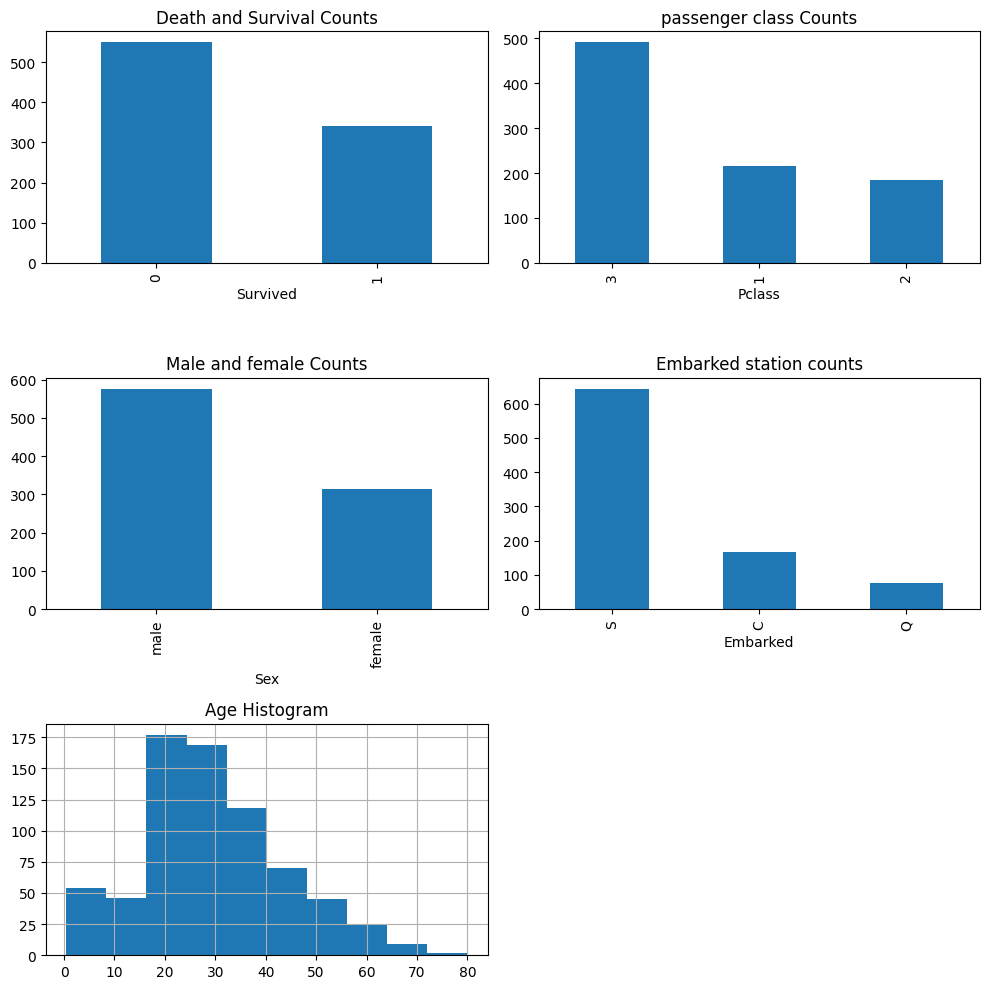

In [70]:
# Plotting death and survival counts
plt.subplot2grid(fig_dims, (0, 0)) #thi plot will be the firat one in the grid
titanic_train['Survived'].value_counts().plot(kind='bar', 
                                         title='Death and Survival Counts')

# Plotting Passenger class counts
plt.subplot2grid(fig_dims, (0,1))
titanic_train['Pclass'].value_counts().plot(kind='bar', 
                                         title='passenger class Counts')

# Plotting Male and female counts
plt.subplot2grid(fig_dims, (1, 0))
titanic_train['Sex'].value_counts().plot(kind='bar', 
                                         title='Male and female Counts')

# Plotting Embarked Station counts
plt.subplot2grid(fig_dims, (1, 1))
titanic_train['Embarked'].value_counts().plot(kind='bar', 
                                         title='Embarked station counts')

# Plotting age of the passengers as a histogram
plt.subplot2grid(fig_dims, (2, 0))
titanic_train['Age'].hist()
plt.title('Age Histogram')

plt.tight_layout()                                     

Feature name: **Passenger Class**
Now we will further explore which of the passenger class( first , second or third) people had more survivors

In [56]:
pclass_surv=pd.crosstab(titanic_train['Pclass'],titanic_train['Survived'])
pclass_surv

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


By looking at the ratios , majority of the passengers survived belong to class 1

Plotting the cross tab:

Text(0, 0.5, 'Survival Rate')

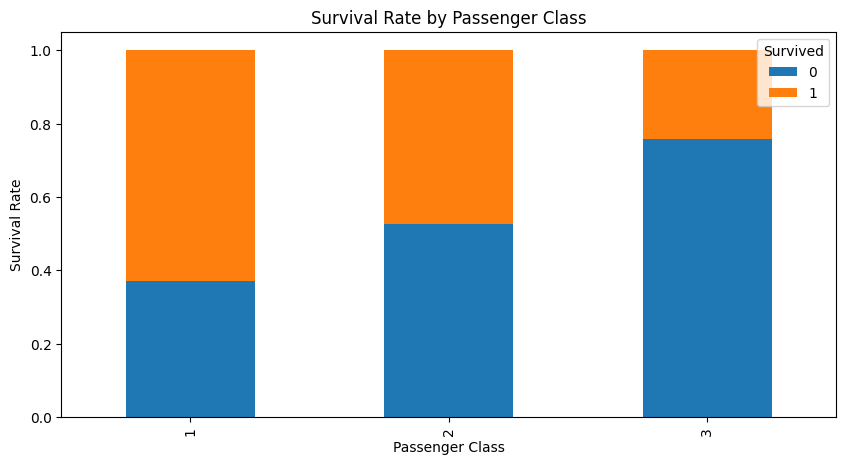

In [66]:
# Normalize the cross tab to sum to 1:
norm_pclass_surv = pclass_surv.div(pclass_surv.sum(1).astype(float), axis=0) #.div() is used to perform division operations on df

norm_pclass_surv.plot(kind='bar', 
                   stacked=True, 
                   title='Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')

In [72]:
sex_surv=pd.crosstab(titanic_train['Sex'],titanic_train['Survived'])
sex_surv

Survived,0,1
Sex,,
female,81,233
male,468,109


Text(0, 0.5, 'Survival Rate')

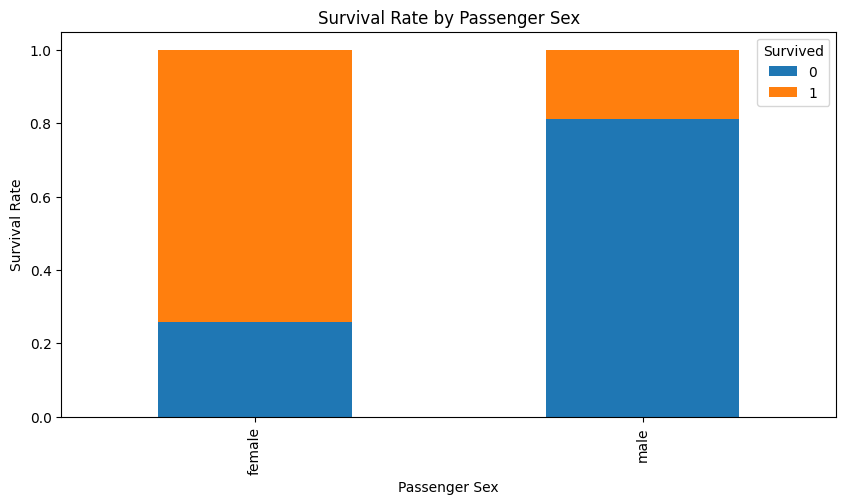

In [64]:
# Normalize the cross tab to sum to 1:
norm_sex_surv = sex_surv.div(sex_surv.sum(1).astype(float), axis=0) #.div() is used to perform division operations on df

norm_sex_surv.plot(kind='bar', 
                   stacked=True, 
                   title='Survival Rate by Passenger Sex')
plt.xlabel('Passenger Sex')
plt.ylabel('Survival Rate')

The survival rate is good among the females

Counting males and females in each Pclass:

In [86]:
passenger_classes = sorted(titanic_train['Pclass'].unique()) #finding the unique passenger classes
passenger_classes

[1, 2, 3]

In [79]:
#Now using these to find how many males and females are in each passenger class

In [89]:
for p in passenger_classes: #In each passenger class, how many males and how many females are there is shown here
    print('M:', p, len(titanic_train[(titanic_train['Pclass']==p) & (titanic_train['Sex']=='male')]))
    print('F:', p, len(titanic_train[(titanic_train['Pclass']==p) & (titanic_train['Sex']=='female')]))

M: 1 122
F: 1 94
M: 2 108
F: 2 76
M: 3 347
F: 3 144


Text(0, 0.5, 'Survival Rate')

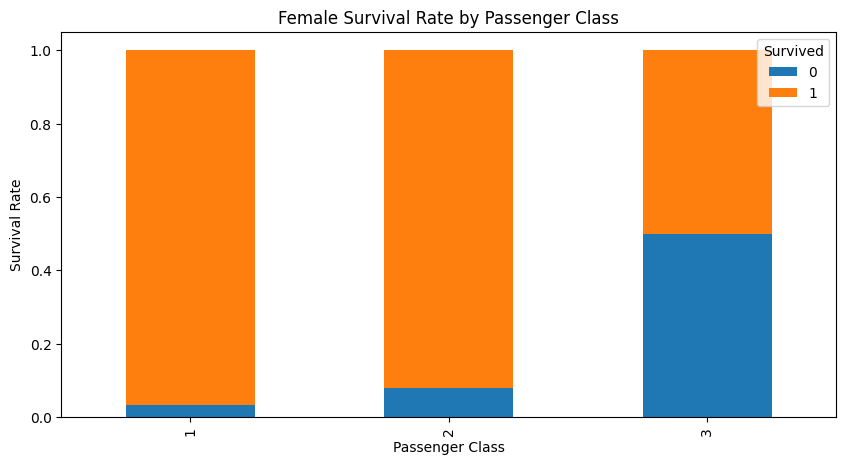

In [93]:
# Plot survival rate for females by passenger class
females_df = titanic_train[titanic_train['Sex'] == 'female']#subset of main df where sex=F only
#print(females_df)
females_xt = pd.crosstab(females_df['Pclass'], females_df['Survived']) #comparing pclass vs survived only for females
females_xt_pct = females_xt.div(females_xt.sum(1).astype(float), axis=0)
females_xt_pct.plot(kind='bar', 
                    stacked=True, 
                    title='Female Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')

Text(0, 0.5, 'Survival Rate')

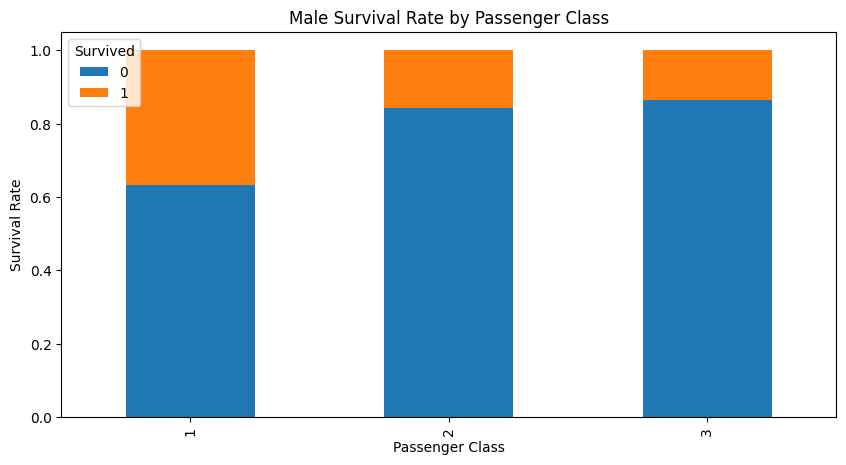

In [94]:
# Plot survival rate for males by passenger class
males_df = titanic_train[titanic_train['Sex'] == 'male']#subset of main df where sex=F only
#print(males_df)
males_xt = pd.crosstab(males_df['Pclass'], males_df['Survived']) #comparing pclass vs survived only for females
males_xt_pct = males_xt.div(males_xt.sum(1).astype(float), axis=0)
males_xt_pct.plot(kind='bar', 
                    stacked=True, 
                    title='Male Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')

It can inferred that female passengers had more survival rate in 1st and 2nd class. Most Male passengers survived are from 1st class

Feature:Embarked

<Axes: title={'center': 'Embarked station counts'}, xlabel='Embarked'>

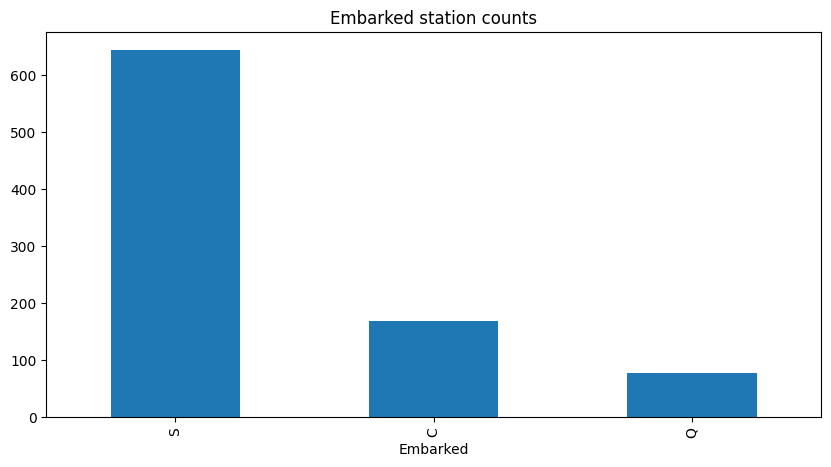

In [95]:
titanic_train['Embarked'].value_counts().plot(kind='bar', 
                                         title='Embarked station counts')

In [104]:
titanic_train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

Since most of the passengers embarked from station S, let us replace nan with S

In [105]:
titanic_train['Embarked'].replace(np.nan,'S',inplace=True) #directly replace values in the column, dont do column=column.replace()

In [106]:
titanic_train['Embarked'].unique() 

array(['S', 'C', 'Q'], dtype=object)

<Axes: xlabel='Embarked'>

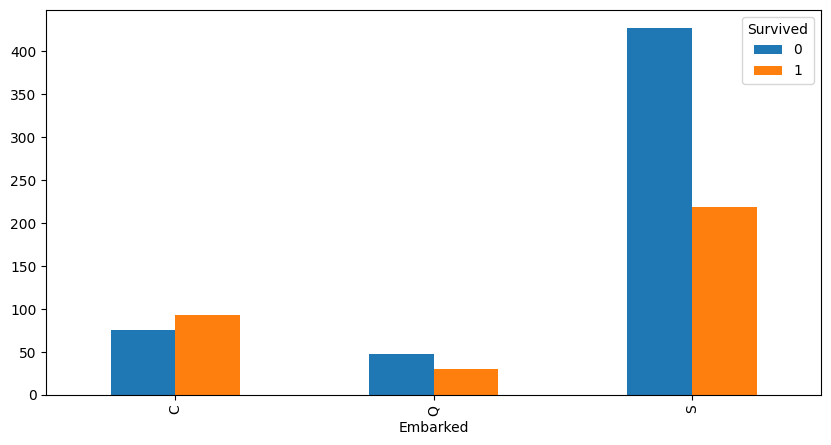

In [111]:
pd.crosstab(titanic_train['Embarked'],titanic_train['Survived']).plot(kind='bar')

Those embarked in station c had the highest survival rate

<Axes: xlabel='Embarked'>

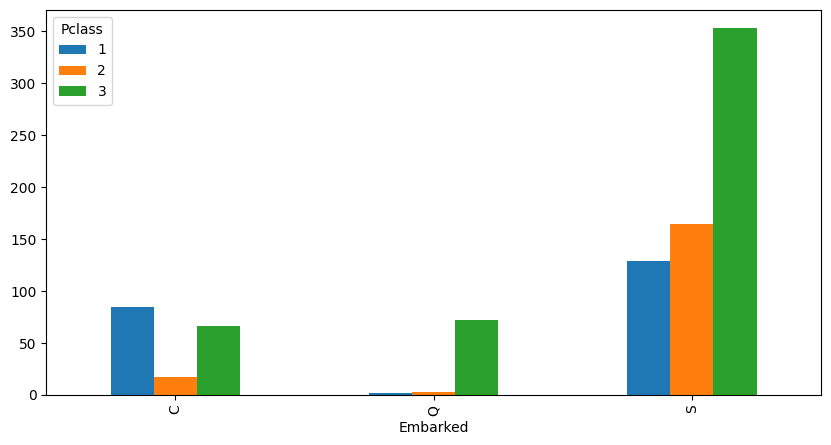

In [112]:
pd.crosstab(titanic_train['Embarked'],titanic_train['Pclass']).plot(kind='bar')

Feature: Age

In [115]:
titanic_train[titanic_train['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [116]:
# Age seems like an important feature, but it has many missing values. So we need to impute the missing values with a median
#Whtever imputation is done on training data set has to be repeated in the testing dataset also. Median calculated when imputing train 
#set should be used while imputing test set

In [121]:
titanic_train[['Age','Sex']].groupby('Sex').median()

,Age
Sex,
female,27.0
male,29.0


In [122]:
titanic_train[['Age','Pclass']].groupby('Pclass').median()

,Age
Pclass,
1,37.0
2,29.0
3,24.0


Text(0, 0.5, 'Count')

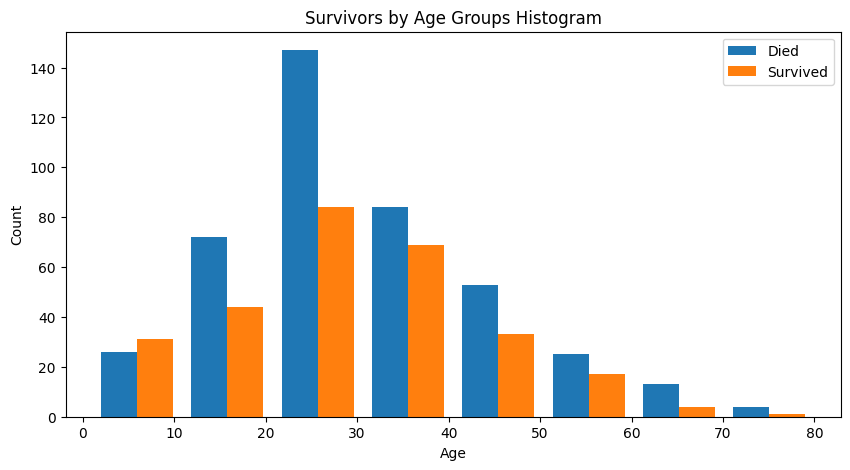

In [124]:
df1 = titanic_train[titanic_train['Survived'] == 0]['Age'] #age data of ppl who haven't survived
df2 = titanic_train[titanic_train['Survived'] == 1]['Age'] #age data of ppl who survived
#print(df1)
plt.hist([df1, df2], bins= 8, range=(1, 80)) #plotting those two disctributing on a single histogram
plt.legend(('Died', 'Survived'), loc='best')
plt.title('Survivors by Age Groups Histogram')
plt.xlabel('Age')
plt.ylabel('Count')

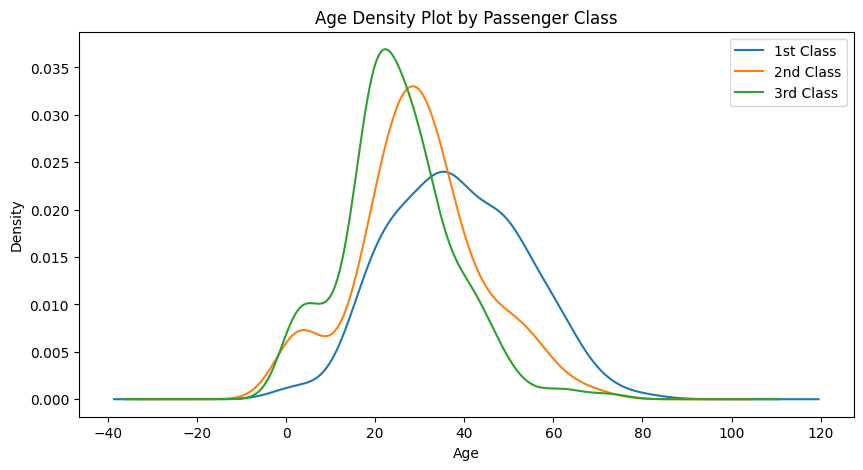

In [125]:
for pclass in passenger_classes:
    titanic_train.Age[titanic_train.Pclass == pclass].plot(kind='kde') #density plot
    
plt.title('Age Density Plot by Passenger Class')
plt.xlabel('Age')
plt.legend(('1st Class', '2nd Class', '3rd Class'), loc='best')

When looking at Age density by Pclass, we see the first class passengers were generally older then second class passengers, which in turn were older than third class passengers. We've determined that first class passengers had a higher survival rate than second class passengers, which in turn had a higher survival rate than third class passengers.

<Axes: >

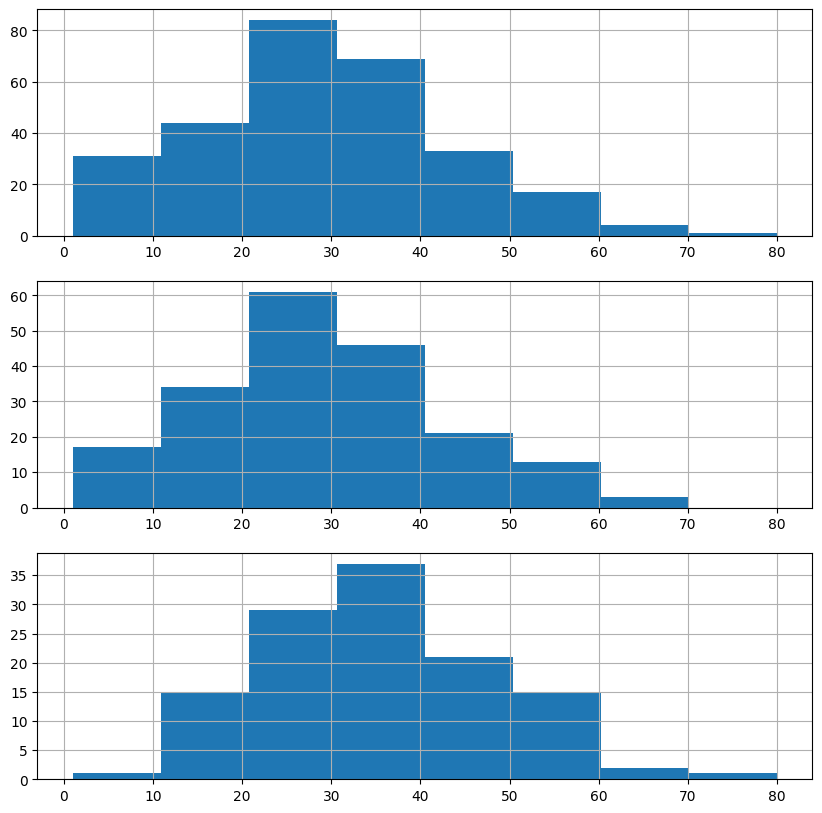

In [127]:
# Set up a grid of plots
fig = plt.figure(figsize=fizsize_with_subplots) 
fig_dims = (3, 1)

# Plot the Age histogram for Survivors
plt.subplot2grid(fig_dims, (0, 0))
survived_df = titanic_train[titanic_train['Survived'] == 1] #Only people who survived as a df
survived_df['Age'].hist(bins=8, range=(1, 80)) #Age distribution of people who have survived
plt.xlabel='Age'
plt.ylabel='Survived'

# Plot the Age histogram for Females
plt.subplot2grid(fig_dims, (1, 0))
females_df = titanic_train[(titanic_train['Sex'] == 'female') & (titanic_train['Survived'] == 1)] #Plotting the survived females age distribution
females_df['Age'].hist(bins=8, range=(1, 80))

# Plot the Age histogram for first class passengers
plt.subplot2grid(fig_dims, (2, 0))
class1_df = titanic_train[(titanic_train['Pclass'] == 1) & (titanic_train['Survived'] == 1)]
class1_df['Age'].hist(bins=8, range=(1, 80))

In the first graph, we see that most survivors come from the 20's to 30's age ranges and might be explained by the following two graphs.  The second graph shows most females are within their 20's.  The third graph shows most first class passengers are within their 30's.

Feature name: Family size

In [130]:
titanic_train['FamilySize'] = titanic_train['SibSp'] + titanic_train['Parch'] #creating a new column
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


Text(0.5, 1.0, 'Family Size histogram')

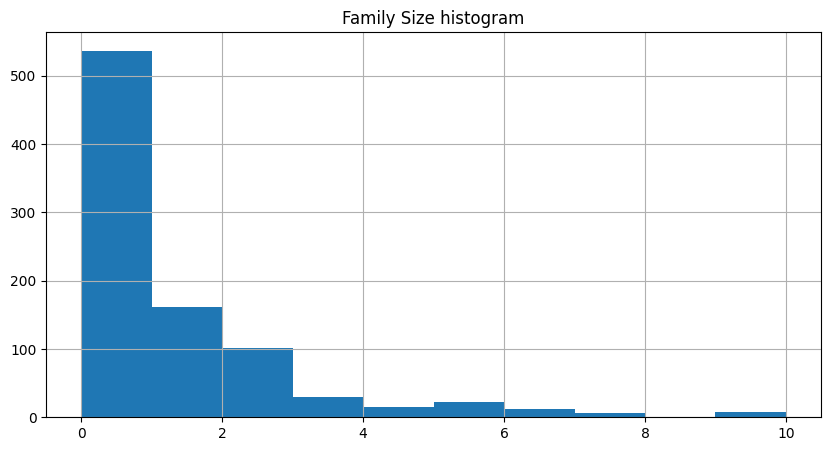

In [132]:
titanic_train['FamilySize'].hist()
plt.title('Family Size histogram')

Text(0.5, 1.0, 'Survivors by Family Size')

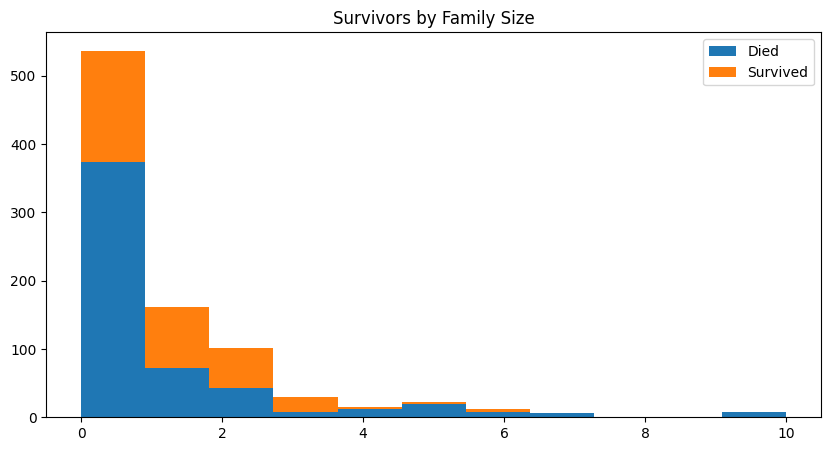

In [134]:
# Get the unique values of Embarked and its maximum
family_sizes = sorted(titanic_train['FamilySize'].unique())
family_size_max = max(family_sizes)

df1 = titanic_train[titanic_train['Survived'] == 0]['FamilySize'] #Died
df2 = titanic_train[titanic_train['Survived'] == 1]['FamilySize'] #Survived
plt.hist([df1, df2], 
         bins=family_size_max + 1, 
         range=(0, family_size_max), #giving the range of x axis to max family size
         stacked=True)
plt.legend(('Died', 'Survived'), loc='best')
plt.title('Survivors by Family Size')

Does Family size has any effect on the survival rate? Its not immediately obvious But ML algorithm might benefit from this feature

In [135]:
titanic_train.groupby(['Pclass', 'SibSp'])[['PassengerId','Survived','Age','Parch','Fare','FamilySize']].median()

PassengerId  Survived   Age  Parch      Fare  FamilySize
Pclass SibSp                                                          
1      0            476.0       1.0  37.0    0.0   39.6000         0.0
       1            485.0       1.0  38.0    0.0   79.2000         1.0
       2            572.0       1.0  44.0    0.0  133.6500         2.0
       3             89.0       1.0  23.0    2.0  263.0000         5.0
2      0            407.0       0.0  30.0    0.0   13.0000         0.0
       1            451.0       1.0  29.0    1.0   26.0000         2.0
       2            565.5       0.5  23.5    1.0   39.0000         3.0
       3            727.0       1.0  30.0    0.0   21.0000         3.0
3      0            472.0       0.0  26.0    0.0    7.8958         0.0
       1            372.0       0.0  25.0    0.0   15.5500         1.0
       2            334.0       0.0  19.5    0.0   19.2583         2.0
       3            302.5       0.0   6.0    1.0   25.4667         4.0
       4            264.5       0.0   6.5    1.5   31.2750         5.5
       5            387.0       0.0  11.0    2.0   46.9000         7.0
       8            325.0       0.0   NaN    2.0   69.5500        10.0

In [137]:
titanic_train.groupby(['Pclass', 'FamilySize'])[['PassengerId','Survived','Age','SibSp','Parch','Fare']].median()

PassengerId  Survived   Age  SibSp  Parch      Fare
Pclass FamilySize                                                     
1      0                 494.0       1.0  38.5    0.0    0.0   31.0000
       1                 389.0       1.0  37.0    1.0    0.0   76.7292
       2                 565.5       1.0  39.5    1.0    1.0   82.5083
       3                 436.0       1.0  14.0    1.0    2.0  120.0000
       4                 527.5       1.0  19.5    2.0    2.0  262.3750
       5                 215.5       0.5  23.5    3.0    2.0  263.0000
2      0                 399.5       0.0  31.0    0.0    0.0   13.0000
       1                 416.5       1.0  29.0    1.0    0.0   26.0000
       2                 507.0       1.0  22.0    1.0    1.0   26.2500
       3                 601.0       1.0  24.0    1.0    2.0   39.0000
       4                 775.0       1.0  54.0    1.0    3.0   23.0000
       5                 438.0       1.0  24.0    2.0    3.0   18.7500
3      0                 473.5       0.0  26.0    0.0    0.0    7.8958
       1                 372.0       0.0  24.5    1.0    0.0   14.4542
       2                 349.0       0.0  24.0    1.0    1.0   15.7417
       3                 645.0       1.0   5.0    1.0    2.0   19.2583
       4                 302.5       0.0  12.5    3.0    1.0   25.4667
       5                 361.0       0.0   8.0    4.0    1.0   29.1250
       6                 248.0       0.0   9.0    4.0    2.0   31.2750
       7                 434.0       0.0  12.5    5.0    2.0   46.9000
       10                325.0       0.0   NaN    8.0    2.0   69.5500

In [139]:
titanic_train.groupby(['Pclass', 'Parch'])[['PassengerId','Survived','Age','SibSp','Parch','Fare','FamilySize']].median()

PassengerId  Survived   Age  SibSp  Parch      Fare  FamilySize
Pclass Parch                                                                 
1      0            487.0       1.0  38.0    0.0    0.0   52.0000         0.0
       1            357.0       1.0  41.5    0.0    1.0   79.6500         1.0
       2            436.0       1.0  21.0    1.0    2.0  120.0000         3.0
       4            439.0       0.0  64.0    1.0    4.0  263.0000         5.0
2      0            403.0       0.0  30.0    0.0    0.0   13.0000         0.0
       1            540.5       1.0  23.5    1.0    1.0   26.2500         2.0
       2            462.0       1.0  23.0    0.5    2.0   27.7500         2.5
       3            606.5       1.0  39.0    1.5    3.0   20.8750         4.5
3      0            445.0       0.0  25.5    0.0    0.0    7.8958         0.0
       1            424.0       0.0  11.5    1.0    1.0   16.7000         2.0
       2            382.0       0.0   9.0    3.0    2.0   31.2750         5.0
       3            737.0       0.0  24.0    1.0    3.0   34.3750         4.0
       4            361.0       0.0  40.0    1.0    4.0   27.9000         5.0
       5            611.0       0.0  39.0    1.0    5.0   31.2750         6.0
       6            679.0       0.0  43.0    1.0    6.0   46.9000         7.0

In [140]:
train_grouped=titanic_train.groupby(['Pclass', 'Parch']) #we are deciding missing ages based on Pclass and parch
titanic_train['Age'] = titanic_train['Age'].fillna(train_grouped['Age'].transform('median'))
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
 12  FamilySize   891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [141]:
titanic_test = pd.read_csv('test.csv')
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [142]:
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
#performing same imputations on test data also

In [143]:
titanic_test['Age'] = titanic_test['Age'].fillna(train_grouped['Age'].transform('median'))
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [145]:
titanic_test['FamilySize'] = titanic_test['SibSp'] + titanic_test['Parch']

In [146]:
## Final Data Preparation for Machine Learning

In [147]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
 12  FamilySize   891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


Dropping the columns we won't use:

In [148]:
titanic_train = titanic_train.drop(['Name', 'Ticket', 'Cabin'], axis=1)
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    object 
 9   FamilySize   891 non-null    int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 69.7+ KB


In [149]:
titanic_test = titanic_test.drop(['Name', 'Ticket', 'Cabin'], axis=1)
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         417 non-null    float64
 7   Embarked     418 non-null    object 
 8   FamilySize   418 non-null    int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 29.5+ KB


<Axes: xlabel='Sex'>

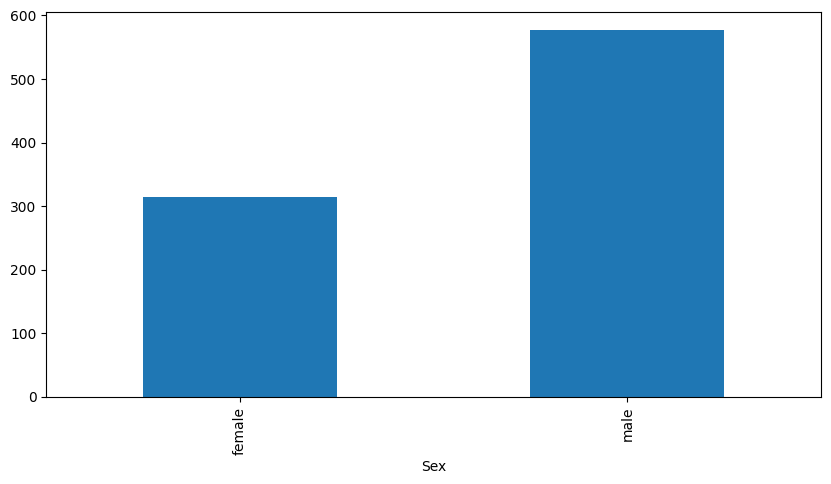

In [150]:
titanic_train.groupby('Sex').count()['PassengerId'].plot(kind = 'bar')

In [151]:
encode={'male':1, 'female':0}
titanic_train['Sex'] = titanic_train['Sex'].map(encode).astype(int)
titanic_test['Sex'] = titanic_test['Sex'].map(encode).astype(int)

We replace the column ``Embarked`` with a one-hot-vector of length 3. 

In [ ]:
cols = pd.get_dummies(titanic_train['Embarked'], prefix= 'Embarked')
#print(cols)
titanic_train[cols.columns] = cols
titanic_train.drop('Embarked', axis = 1, inplace = True)

In [164]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int32  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   FamilySize   891 non-null    int64  
 9   Embarked_C   891 non-null    bool   
 10  Embarked_Q   891 non-null    bool   
 11  Embarked_S   891 non-null    bool   
dtypes: bool(3), float64(2), int32(1), int64(6)
memory usage: 61.9 KB


In [155]:
cols = pd.get_dummies(titanic_test['Embarked'], prefix= 'Embarked')
titanic_test[cols.columns] = cols
titanic_test.drop('Embarked', axis = 1, inplace = True)

In [157]:
titanic_train[['Survived', 'Fare']].groupby('Survived').mean()

,Fare
Survived,
0,22.117887
1,48.395408


In [158]:
#Imputing the missing values for fare in test data using the calculated means

In [159]:
titanic_train[['Pclass', 'Fare']].groupby('Pclass').mean()

,Fare
Pclass,
1,84.154687
2,20.662183
3,13.675550


In [161]:
titanic_test['Fare'] = titanic_test['Fare'].fillna(titanic_train.groupby('Pclass')['Fare'].transform('mean'))
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int32  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
 7   FamilySize   418 non-null    int64  
 8   Embarked_C   418 non-null    bool   
 9   Embarked_Q   418 non-null    bool   
 10  Embarked_S   418 non-null    bool   
dtypes: bool(3), float64(2), int32(1), int64(5)
memory usage: 25.8 KB


In [ ]:
#Final Training data
map={True: 1, False:0}
titanic_train['Embarked_C'] = titanic_train['Embarked_C'].map(map).astype(int)

In [169]:
titanic_train['Embarked_Q'] = titanic_train['Embarked_Q'].map(map).astype(int)
titanic_train['Embarked_S'] = titanic_train['Embarked_S'].map(map).astype(int)

In [170]:
titanic_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,FamilySize,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,1,22.0,1,0,7.2500,1,0,0,1
1,2,1,1,0,38.0,1,0,71.2833,1,1,0,0
2,3,1,3,0,26.0,0,0,7.9250,0,0,0,1
3,4,1,1,0,35.0,1,0,53.1000,1,0,0,1
4,5,0,3,1,35.0,0,0,8.0500,0,0,0,1


In [171]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int32  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   FamilySize   891 non-null    int64  
 9   Embarked_C   891 non-null    int32  
 10  Embarked_Q   891 non-null    int32  
 11  Embarked_S   891 non-null    int32  
dtypes: float64(2), int32(4), int64(6)
memory usage: 69.7 KB


In [172]:
## KNN: Training

In [173]:
X = titanic_train.drop('Survived', axis = 1) #These features are used for learning
y = titanic_train['Survived'] #This is the one we predict

In [174]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0) #we are doing test train split again
#and gettin 2 more data sets because we wanna improve the ability to perform hyperparameter tuning on our models

In [176]:
scaler = StandardScaler() #scaling step
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)
df_test_scaled = scaler.transform(titanic_test)

In [177]:
df_test_scaled

array([[ 1.71722938,  0.83012938,  0.72705166, ..., -0.45841567,
         3.1832897 , -1.67196129],
       [ 1.72107891,  0.83012938, -1.37541808, ..., -0.45841567,
        -0.31414043,  0.59809997],
       [ 1.72492843, -0.36497068,  0.72705166, ..., -0.45841567,
         3.1832897 , -1.67196129],
       ...,
       [ 3.31478339,  0.83012938,  0.72705166, ..., -0.45841567,
        -0.31414043,  0.59809997],
       [ 3.31863292,  0.83012938,  0.72705166, ..., -0.45841567,
        -0.31414043,  0.59809997],
       [ 3.32248245,  0.83012938,  0.72705166, ...,  2.1814263 ,
        -0.31414043, -1.67196129]])

TypeError: 'str' object is not callable

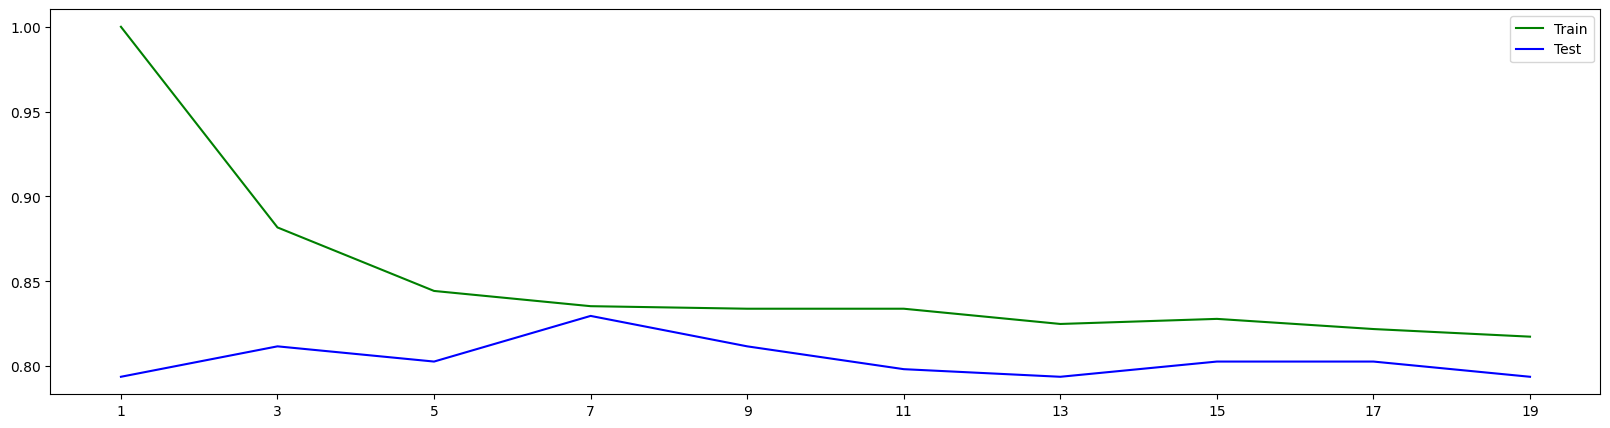

In [180]:
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier

train_array = []
test_array = []
x_axis = range(1,20,2)

#We will generate only odd number of neighbors to avoid ties
for k in range(1,20,2):
    knn=KNeighborsClassifier(n_neighbors = k)   
    knn.fit(X_train,y_train)
    train_score=knn.score(X_train,y_train)
    test_score=knn.score(X_test,y_test)
    train_array.append(train_score)
    test_array.append(test_score)

plt.subplots(figsize = (20,5))
plt.plot(x_axis, train_array, c='g', label = 'Train')
plt.plot(x_axis, test_array, c='b', label = 'Test')
plt.xticks(x_axis, range(1,20,2))
plt.legend()
plt.xlabel('no of neighbors')
plt.ylabel('Accuracy')


In [183]:
knn=KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train, y_train)
print('Train score: %.4f'%knn.score(X_train, y_train))
print('Test score: %.4f'%knn.score(X_test, y_test))

Train score: 0.8353
Test score: 0.8296


In [184]:
final_test_prediction = knn.predict(df_test_scaled) #Using predict method on test data to do the prediction

In [185]:
final_test_prediction

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,